### **Group # 1 - Section 74984**

Reef Althunayan 441201390 

Arwa Alabdulkarim 441201304

Sadeem Almujil 442202286

## Phase 2 : Supervised learning

Supervised learning is a type of machine learning where a model is trained on a labeled dataset. It is commonly used in a wide range of applications, including natural language processing.


In supervised learning, our dataset consists of two textual input features (also known as predictors or independent variables), which are 'premise' and 'hypothesis', and corresponding integer output labels (also known as responses or dependent variables), which is 'label' that has 3 possible values (0 for entailment, 1 for neutral, and 2 for contradiction).


The goal of supervised learning is to learn a mapping function that can predict the output labels for new, unseen input features.

In [382]:
#needed libraries imports
import pandas as pd
from matplotlib import style
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from graphviz import Source
from sklearn import metrics
from sklearn.metrics import precision_score , recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [355]:
#loading the dataset after the preprocessing and cleaning in phase #1
df = pd.read_csv(r'./train_after_cleanning.csv')
df.head(5)

,premise,hypothesis,label,premise_vectors,hypothesis_vectors
0,"['and', 'these', 'comments', 'were', 'consider...","['the', 'rules', 'developed', 'in', 'the', 'in...",0,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...,[-0.22748104 -0.03450689 0.564092 -0.687629...
1,"['these', 'are', 'issues', 'that', 'we', 'wres...","['practice', 'groups', 'are', 'not', 'permitte...",2,[-2.2742710e-01 -3.6777418e-02 5.6592155e-01 ...,[-2.2779953e-01 -2.1100001e-02 5.5328900e-01 ...
2,"['you', 'know', 'they', 'cant', 'really', 'def...","['they', 'cant', 'defend', 'themselves', 'beca...",0,[-2.27337718e-01 -4.05399986e-02 5.68953395e-...,[-0.22807117 -0.00966471 0.5440747 -0.666615...
3,"['from', 'cockpit', 'country', 'to', 'st', 'an...","['from', 'st', 'anns', 'bay', 'to', 'cockpit',...",2,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...,[-2.2826132e-01 -1.6600012e-03 5.3762472e-01 ...
4,"['look', 'its', 'your', 'skin', 'but', 'youre'...","['the', 'boss', 'will', 'fire', 'you', 'if', '...",1,[-2.2737969e-01 -3.8772728e-02 5.6752932e-01 ...,[-0.22769913 -0.02532609 0.55669427 -0.679863...


### Data splitting

In [356]:
# Extract the embeddings from the appropriate columns and convert to floats
embeddings1 = df.iloc[:, -2].apply(lambda x: np.fromstring(x[1:-1], sep=' ')).values
embeddings2 = df.iloc[:, -1].apply(lambda x: np.fromstring(x[1:-1], sep=' ')).values
Y = df.iloc[:, -3].values

print("Embeddings1 shape:", embeddings1.shape)
print("Embeddings2 shape:", embeddings2.shape)
print("Labels shape:", Y.shape)

# Reshape the embeddings to 2D arrays with a single column
embeddings1 = np.reshape(embeddings1, (-1, 1))
embeddings2 = np.reshape(embeddings2, (-1, 1))

# Combine the embeddings into a single array
X = np.concatenate((embeddings1, embeddings2), axis=1)

# Extract the inner array and reshape it to a 2D array
X= np.array([x[0] for x in X]).reshape(-1, len(X[0][0]))

# Create a list of feature names based on the position of the columns
feature_names = ['feature_{}'.format(i) for i in range(X.shape[1])]

# Print the shape of the resulting dataset
print("Dataset shape: ", X.shape, Y.shape)

Embeddings1 shape: (3234,)
Embeddings2 shape: (3234,)
Labels shape: (3234,)
Dataset shape:  (3234, 100) (3234,)


In [357]:
#  Split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set: ", X_train.shape, y_train.shape)
print("Test set: ", X_test.shape, y_test.shape)

Training set:  (2587, 100) (2587,)
Test set:  (647, 100) (647,)


### Data modeling

##### Data modeling using supervised learning algorithms is a process of building a predictive model based on a labeled dataset.


##### After extensive research on how to select the appropriate supervised learning algorithm for the NLI problem, we found the following algorithms :


- **Decision trees:** It works by recursively partitioning the input space into smaller regions based on the input features and assigning a class label to each region based on the majority class of the training samples in that region.


- **Support Vector Classification (SVC):** is a variant of SVMs that is specifically designed for classification problems. SVC can be used for both binary and multiclass classification problems.


- **Logistic regression:** It can be trained on a bag-of-words representation of the premise and hypothesis or on more sophisticated representations such as word embeddings or contextual embeddings.

#### 1. Decision tree model

Because the model's accuracy was so poor, we performed a grid search in order increase it as much as we could.

In [358]:
# Define the hyperparameters to search over
params = {'max_depth': [1, 2, 3, 4, 5],
          'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0, 10.0]}

# Create an instance of the GridSearchCV class
grid = GridSearchCV(clf, params, cv=5)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Create an instance of the DecisionTreeClassifier class with the best hyperparameters
best_clf = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], ccp_alpha=grid.best_params_['ccp_alpha'])

# Train the model using the training data
best_clf.fit(X_train, y_train)

#try the model
y_predict = best_clf.predict(X_test)


Best hyperparameters:  {'ccp_alpha': 0.001, 'max_depth': 4}
Best score:  0.35098765524297443


In [359]:
#evaluate the model
acc = accuracy_score(y_test, y_predict)
print("Model's accuracy: {:.2%}".format(acc))

Model's accuracy: 35.70%


##### Decision tree intrepretation

In [360]:
#classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.36      0.86      0.51       227
           1       0.47      0.04      0.07       220
           2       0.32      0.14      0.19       200

    accuracy                           0.36       647
   macro avg       0.38      0.35      0.26       647
weighted avg       0.38      0.36      0.26       647



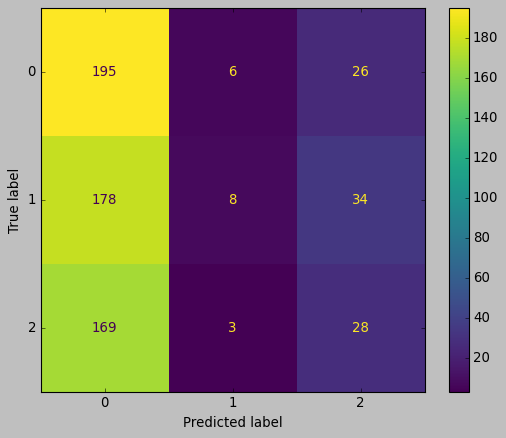

In [361]:
#confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()

As the confusion matrix shows, the model's accuracy is high regarding label 0, while most of the other labels (1 and 2) are misclassified as 0.

In [323]:
class_names = ['entailment', 'neutral','contradiction']
# Export the decision tree as a Graphviz file
dot_data = export_graphviz(best_clf, out_file=None, 
                           feature_names=feature_names,  
                           class_names=class_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree.dot",view=True)

'decision_tree.dot.pdf'

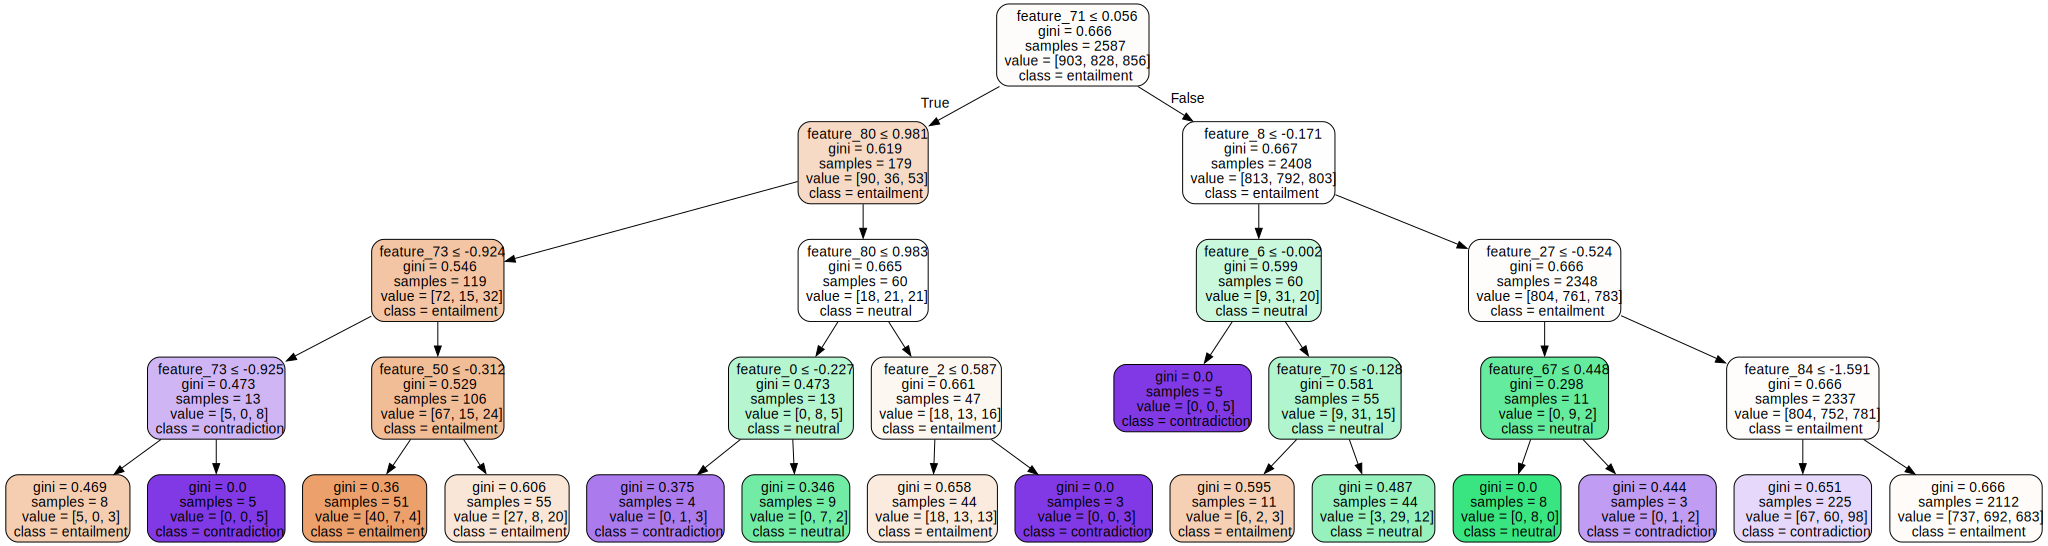

In [324]:
# Load the Graphviz file and display the tree
Source.from_file("decision_tree.dot")

The above graph show the decision tree structure, with each node representing a decision based on one of the input features. The color and size of the nodes can indicate the importance of the feature for classification, and the edges between nodes can indicate the decision boundaries between classes.

#### 2. SVC

In [398]:
X2 = df['premise'] + ' ' + df['hypothesis']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [399]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train2)
X_test_vec = vectorizer.transform(X_test2)

In [403]:
#initilize the model
svc = SVC(kernel='linear')

#train the model
svc.fit(X_train_vec, y_train2)

#try the model
y_pred = svc.predict(X_test_vec.toarray())

In [404]:
#checking the model's accuracy
SVC_accuracy = accuracy_score(y_test , y_pred)
print("Model's accuracy: {:.2f}%".format(SVC_accuracy*100))

Model's accuracy: 36.17%


##### SVC intrepretation

In [405]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.41      0.38       227
           1       0.34      0.28      0.30       220
           2       0.38      0.41      0.39       200

    accuracy                           0.36       647
   macro avg       0.36      0.36      0.36       647
weighted avg       0.36      0.36      0.36       647



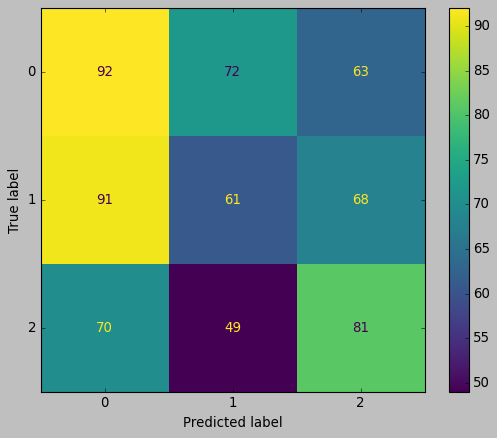

In [406]:
labels = [0,1,2]
#confusion matrix
style.use('classic')
cm = confusion_matrix(y_test2, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)
disp.plot()

The 

-----

**Support vector**
The support vector importance in SVC lies in the fact that the model is trained using only a subset of the training data points that are closest to the decision boundary.

In [410]:
# Examine support vectors
support_vectors = svc.support_vectors_
num_support_vectors = support_vectors.getnnz()
print('Number of support vectors:', num_support_vectors)

Number of support vectors: 51890


There are 51890 data points from the training set that are used to define the decision boundary in the SVM model.

---

**Decision boundaries**

The decision boundary is the region where the SVM model assigns one class or the other to a given data point. Data points that lie on one side of the decision boundary are classified as one class, while data points that lie on the other side are classified as the other class.

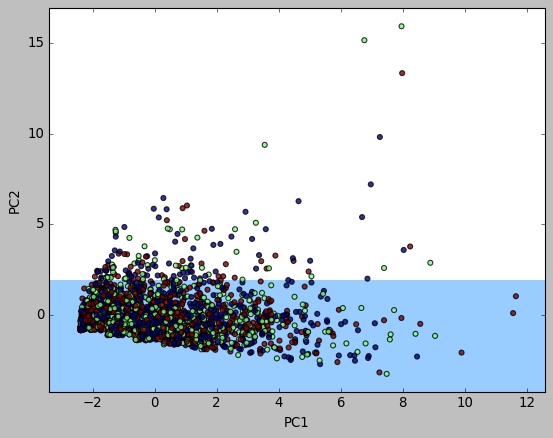

In [416]:
from sklearn.decomposition import PCA
# Reduce the feature space to 2 dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_vec.toarray())
# Plot decision boundaries in the reduced feature space
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_vec[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train2, alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The above graph shows that different classes of data points are very cohesive and close to each other, it generally means that the classification problem at hand is difficult, and the classes are not well-separated in the feature space. In such a scenario, it may be challenging for a classification model to accurately distinguish between the different classes, and the model's performance may suffer. This can be due to various reasons, such as high overlap between the feature distributions of different classes

#### 3. Logistic Regression

In [392]:
#initilize the model
reg = LogisticRegression(max_iter=5000)

#train the model
reg.fit(X_train, y_train)

#try the model
y_predd = reg.predict(X_test)

#model's accuracy
R_accuracy = accuracy_score(y_predd , y_test)
print("Model's accuracy: {:.2f}%".format(R_accuracy*100))

Model's accuracy: 34.16%


##### Logistic regression intrepretation

In [393]:
#classification report
print(classification_report(y_test, y_predd))

              precision    recall  f1-score   support

           0       0.35      0.79      0.49       227
           1       0.32      0.10      0.15       220
           2       0.28      0.10      0.15       200

    accuracy                           0.34       647
   macro avg       0.32      0.33      0.26       647
weighted avg       0.32      0.34      0.27       647



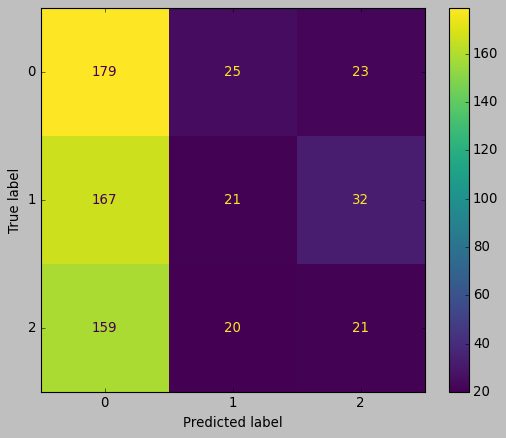

In [394]:
labels = [0,1,2]
#confusion matrix
style.use('classic')
cm = confusion_matrix(y_test, y_predd, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=labels)
disp.plot()

As with the decision tree model, the model's accuracy is high regarding label 0, while most of the other labels (1 and 2) are misclassified as 0.

-----

**Cross-validation**
Cross-validation is a technique used to evaluate the performance of the logistic regression model on multiple test sets. This can help assess the generalizability of the model and reduce the risk of overfitting to the training data.

In **cross-validation**, the dataset is divided into several subsets, or "folds", and the model is trained and evaluated on each fold in turn. One common approach is **k-fold** cross-validation, where the dataset is divided into k equal-sized folds. The model is trained on k-1 folds and evaluated on the remaining fold, and this process is repeated k times with each fold serving as the test set once. The results from each fold are then averaged to provide an overall estimate of the model's performance.

In [395]:
scores = cross_val_score(reg, X, Y, cv=5)

In [396]:
print('Accuracy scores:', scores)
print('Mean accuracy score:', scores.mean())

Accuracy scores: [0.32766615 0.34930448 0.3446677  0.36476043 0.34829721]
Mean accuracy score: 0.34693919542924956


cv=5 specifies 5-fold cross-validation, and the cross_val_score() function returns the accuracy score for each fold. The mean() method is then used to calculate the mean accuracy score across all folds. And as it's shown above the mean accuracy score is **34.7%**.

### Result interpretation and findings

The results of the supervised learning for the natural language inference (NLI) problem indicate that the decision tree model was one of the models tested and achieved an accuracy of 35.70%. However, when examining other metrics, such as precision, recall, and F1-score, it appears that the decision tree model has room for improvement.

The decision tree model achieved a precision of 0.38, a recall of 0.34, and an F1-score of 0.26. These scores suggest that the model may not be performing well on one or more of the classes or that it may be biased towards one class. Further investigation is needed to determine the cause of the low precision, recall, and F1-score.

In comparison, the SVC model had the highest accuracy of 36.17%, but its precision, recall, and F1-score are still quite low, with a precision of 0.36, a recall of 0.36, and an F1-score of 0.36. These scores suggest that the SVC model is not performing well on the task.

The logistic regression model had the lowest accuracy of 34.16%, but it achieved a relatively high precision of 0.32, recall of 0.33, and F1-score of 0.27. These scores suggest that the logistic regression model may be performing well on one or more of the classes, but may require further investigation to determine its strengths and weaknesses.

Overall, the results suggest that the decision tree model has room for improvement in terms of precision, recall, and F1-score. While the SVC model has the highest accuracy, it still needs to improve in these key metrics. Further investigation is needed to determine the strengths and weaknesses of each model and to determine which model is the most suitable for the NLI problem.